# *Traffic Sign Recognizer - 99% accuracy*

## Importing Required Libraries

In [21]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from seaborn import heatmap
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

## Assigning Path for Dataset

In [10]:
# data_dir = '../input/gtsrb-german-traffic-sign'
# train_path = '../input/gtsrb-german-traffic-sign/Train'
# test_path = '../input/gtsrb-german-traffic-sign/'

# Resizing the images to 32x32x3
IMG_HEIGHT = 32
IMG_WIDTH = 32
channels = 3

## Finding Total Classes

## Collecting the Training Data

In [2]:
# Opening file for reading in binary mode
import pickle
with open('D:\Project\Traffic Sign Detection\DATABASE/data3.pickle', 'rb') as f:
    image_data = pickle.load(f, encoding='latin1')  # dictionary type
    
    
# Making channels come at the end
image_data['x_train'] = image_data['x_train'].transpose(0, 2, 3, 1)
image_data['x_validation'] = image_data['x_validation'].transpose(0, 2, 3, 1)
image_data['x_test'] = image_data['x_test'].transpose(0, 2, 3, 1)


X_test = image_data['x_test']
# ind = np.random.choice(X_test.shape[0],3657)
X_test = X_test#[ind]
y_test = image_data['y_test']#[ind]


In [3]:
with open('D:\Project\Traffic Sign Detection\DATABASE/data0.pickle', 'rb') as f:
    image_data = pickle.load(f, encoding='latin1')  # dictionary type
    
    
# Making channels come at the end
image_data['x_test'] = image_data['x_test'].transpose(0, 2, 3, 1)


X_test_0 = image_data['x_test']

In [4]:
with open('D:\Project\Traffic Sign Detection\DATABASE/data8.pickle', 'rb') as f:
    gray_data = pickle.load(f, encoding='latin1')  # dictionary type
    
    
# Making channels come at the end
gray_data['x_train'] = gray_data['x_train'].transpose(0, 2, 3, 1)
gray_data['x_validation'] = gray_data['x_validation'].transpose(0, 2, 3, 1)
gray_data['x_test'] = gray_data['x_test'].transpose(0, 2, 3, 1)


gray_test_imgs = gray_data['x_test']#[ind]

gray_test_labels = gray_data['y_test']#[ind]


In [5]:
# gray_train_labels[gray_train_labels <= 10] = 0 #cycle
# gray_train_labels[gray_train_labels >= 32] = 0 #cycle
# gray_train_labels[(gray_train_labels == 15) |(gray_train_labels == 16)| (gray_train_labels ==17)] = 0 #cycle
# gray_train_labels[(gray_train_labels >= 18) & (gray_train_labels <= 31)] = 1 #triangle
# gray_train_labels[(gray_train_labels == 13) | (gray_train_labels == 11)] = 1 #triangle
# gray_train_labels[gray_train_labels == 14] = 2 # 6
# gray_train_labels[gray_train_labels == 12] = 3 # 4


gray_test_labels[gray_test_labels <= 10] = 0 #cycle
gray_test_labels[gray_test_labels >= 32] = 0 #cycle
gray_test_labels[(gray_test_labels == 15) |(gray_test_labels == 16)| (gray_test_labels ==17)] = 0 #cycle
gray_test_labels[(gray_test_labels >= 18) & (gray_test_labels <= 31)] = 1 #triangle
gray_test_labels[(gray_test_labels == 13) | (gray_test_labels == 11)] = 1 #triangle
gray_test_labels[gray_test_labels == 14] = 2 # 6
gray_test_labels[gray_test_labels == 12] = 3 # 4

# gray_valid_labels[gray_valid_labels <= 10] = 0 #cycle
# gray_valid_labels[gray_valid_labels >= 32] = 0 #cycle
# gray_valid_labels[(gray_valid_labels == 15) |(gray_valid_labels == 16)| (gray_valid_labels ==17)] = 0 #cycle
# gray_valid_labels[(gray_valid_labels >= 18) & (gray_valid_labels <= 31)] = 1 #triangle
# gray_valid_labels[(gray_valid_labels == 13) | (gray_valid_labels == 11)] = 1 #triangle
# gray_valid_labels[gray_valid_labels == 14] = 2 # 6
# gray_valid_labels[gray_valid_labels == 12] = 3 # 4

In [6]:

# gray_x_train = gray_train_imgs
gray_x_test = gray_test_imgs
# gray_x_valid = gray_valid_imgs

# # Normalization
# x_train = x_train / 255
# x_test = x_test / 255

num_class_shape = 4

# One Hot Encoding
# gray_y_train = keras.utils.to_categorical(gray_train_labels, num_class_shape)
gray_y_test = keras.utils.to_categorical(gray_test_labels, num_class_shape)
# gray_y_valid = keras.utils.to_categorical(gray_valid_labels, num_class_shape)



In [7]:
def canny(x):
    for i in range(0 , x.shape[0]):
        # enh = ImageEnhance.Brightness(Image.fromarray(np.uint8(x[i]* 255)))
        # enh_img = enh.enhance(2)
        x[i,:,:,0] = cv2.Canny(x[i], 100, 150)

        
    return x[:,:,:,0]

In [8]:
def add_canny(cycle_test_imgs):
    x_test = np.zeros((cycle_test_imgs.shape[0], 32,32,4))
    edges_test =  canny(np.uint8(cycle_test_imgs))
    x_test[:,:,:,0:3] = cycle_test_imgs

    x_test[:,:,:,3] = edges_test


    x_test = x_test / 255
    return x_test


In [9]:
y_test = image_data['y_test']


In [10]:
tri_Dict = {0:11 , 1:13 , 2:18 , 3:19 , 4:20 , 5:21 , 6:22 , 7:23 , 8:24 , 9:25 , 10:26 , 11:27 , 12:28 , 13:29 , 14:30 , 15:31 }


In [11]:
cy_Dict = {0:0 ,1:1 ,2:2, 3:3 , 4:4 , 5:5 , 6:6 , 7:7 , 8:8 , 9:9 ,10:10 ,11:15 , 12:16 , 13:17 , 14:32 , 15:33 , 16:34 , 17:35 , 18:36 , 19:37 , 20:38 , 21:39 , 22:40 , 23:41 , 24:42 }



## Ensemble Model

In [22]:
cy_model = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel//final//circle_classifier_data0_acc98_edge_36per.h5')
tri_model = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\tri_classifier_model_acc96.h5')


In [13]:
model = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\new shape classifier\\shape_classifier_3_4_VS_cir_6_acc9982_36percent.h5')
model_1 = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\new shape classifier\\shape_classifier_circleVS6di_acc9995_36percent.h5')
model_2 = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\new shape classifier\\shape_classifier_triangleVS4di_acc9967_36percent.h5')

In [ ]:
model = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\new shape classifier\\shape_classifier_3_4_VS_cir_6_acc9983_all.h5')
model_1 = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\new shape classifier\\shape_classifier_circleVS6di_acc9986_all.h5')
model_2 = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\new shape classifier\\shape_classifier_triangleVS4di_acc9986_all.h5')

In [23]:
pred = model.predict(gray_x_test).argmax(axis = 1)
x_1 = gray_x_test[pred == 0] # cir of 6
x_2 = gray_x_test[pred == 1] # tri of 4

pred_1 = model_1.predict(x_1).argmax(axis = 1)
pred_2 = model_2.predict(x_2).argmax(axis = 1)
print(pred_2)

pred_1[pred_1 == 1] = 2 # 6

pred_2[pred_2 == 1] = 3 # 4
pred_2[pred_2 == 0] = 1 # tir


pred[pred == 0] = pred_1
pred[pred == 1] = pred_2

132/132 [==============================] - 0s 4ms/step
[0 0 1 ... 0 1 0]


In [24]:
predictions = pred



In [25]:
pred = np.zeros((y_test.shape))
cir_indx = np.where(predictions== 0)
cir_x_test = add_canny(X_test_0[cir_indx])
cir_pred = cy_model.predict(cir_x_test).argmax(axis=-1)
cir_pred = np.vectorize(cy_Dict.get)(cir_pred)
pred[cir_indx] = cir_pred

tri_indx = np.where(predictions == 1)
tri_pred = tri_model.predict(X_test[tri_indx]).argmax(axis=-1)
tri_pred = np.vectorize(tri_Dict.get)(tri_pred)
pred[tri_indx] = tri_pred
for i , j in [12 , 3] , [14 , 2]:
    rec_indx = np.where(predictions == j)
    pred[rec_indx] = i

111/111 [==============================] - 2s 18ms/step


In [17]:
cir_x_test = add_canny(X_test[cir_indx])

In [52]:
a = cir_x_test[0][:,:,0:3]
b = cir_x_test[0][:,:,3]
c = canny(a)
print(cir_x_test[0].shape)
plt.imshow(c * 255)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\canny.cpp:829: error: (-215:Assertion failed) _src.depth() == CV_8U in function 'cv::Canny'


In [34]:
# cr = classification_report(y_test, pred ,output_dict = False)
print(cr)

{'0': {'precision': 0.8450704225352113, 'recall': 1.0, 'f1-score': 0.916030534351145, 'support': 60}, '1': {'precision': 0.9481582537517054, 'recall': 0.9652777777777778, 'f1-score': 0.9566414315209911, 'support': 720}, '2': {'precision': 0.9478609625668449, 'recall': 0.9453333333333334, 'f1-score': 0.9465954606141522, 'support': 750}, '3': {'precision': 0.9277899343544858, 'recall': 0.9422222222222222, 'f1-score': 0.9349503858875412, 'support': 450}, '4': {'precision': 0.9825119236883942, 'recall': 0.9363636363636364, 'f1-score': 0.9588828549262994, 'support': 660}, '5': {'precision': 0.90527950310559, 'recall': 0.9253968253968254, 'f1-score': 0.9152276295133438, 'support': 630}, '6': {'precision': 0.9772727272727273, 'recall': 0.86, 'f1-score': 0.9148936170212766, 'support': 150}, '7': {'precision': 0.9622641509433962, 'recall': 0.9066666666666666, 'f1-score': 0.9336384439359268, 'support': 450}, '8': {'precision': 0.9043659043659044, 'recall': 0.9666666666666667, 'f1-score': 0.93447

In [33]:
acc = accuracy_score(y_test, pred )
print(acc)

0.9612034837688044


In [29]:
cr = classification_report(y_test, pred ,output_dict = True)
a = np.zeros((43))
for i in range(0 , 43):
    a[i] = cr[str(i)]['f1-score']

In [ ]:
print(cr['weighted avg'])

In [32]:
for i in a:
    print(round(i * 100,2 ))#* 100 , 2

91.6
95.66
94.66
93.5
95.89
91.52
91.49
93.36
93.45
97.63
97.78
93.92
98.76
98.96
99.25
98.1
99.67
98.89
97.28
97.56
91.84
79.22
97.07
97.7
98.34
96.02
91.12
88.72
97.07
98.36
93.84
99.26
98.36
99.53
97.54
98.45
99.17
97.56
98.04
96.17
92.05
83.19
97.3


<AxesSubplot: >

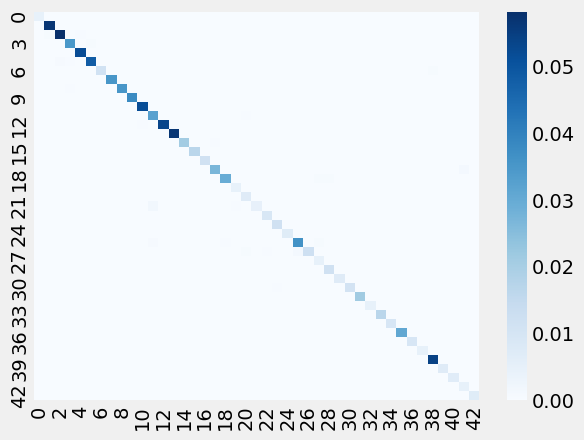

In [57]:
cm = confusion_matrix(y_test, pred)
heatmap(cm / np.sum(cm), annot=False, 
            fmt='.2%', cmap='Blues')

Text(0.5, 1.0, 'Correlation between Variables in happiness21')

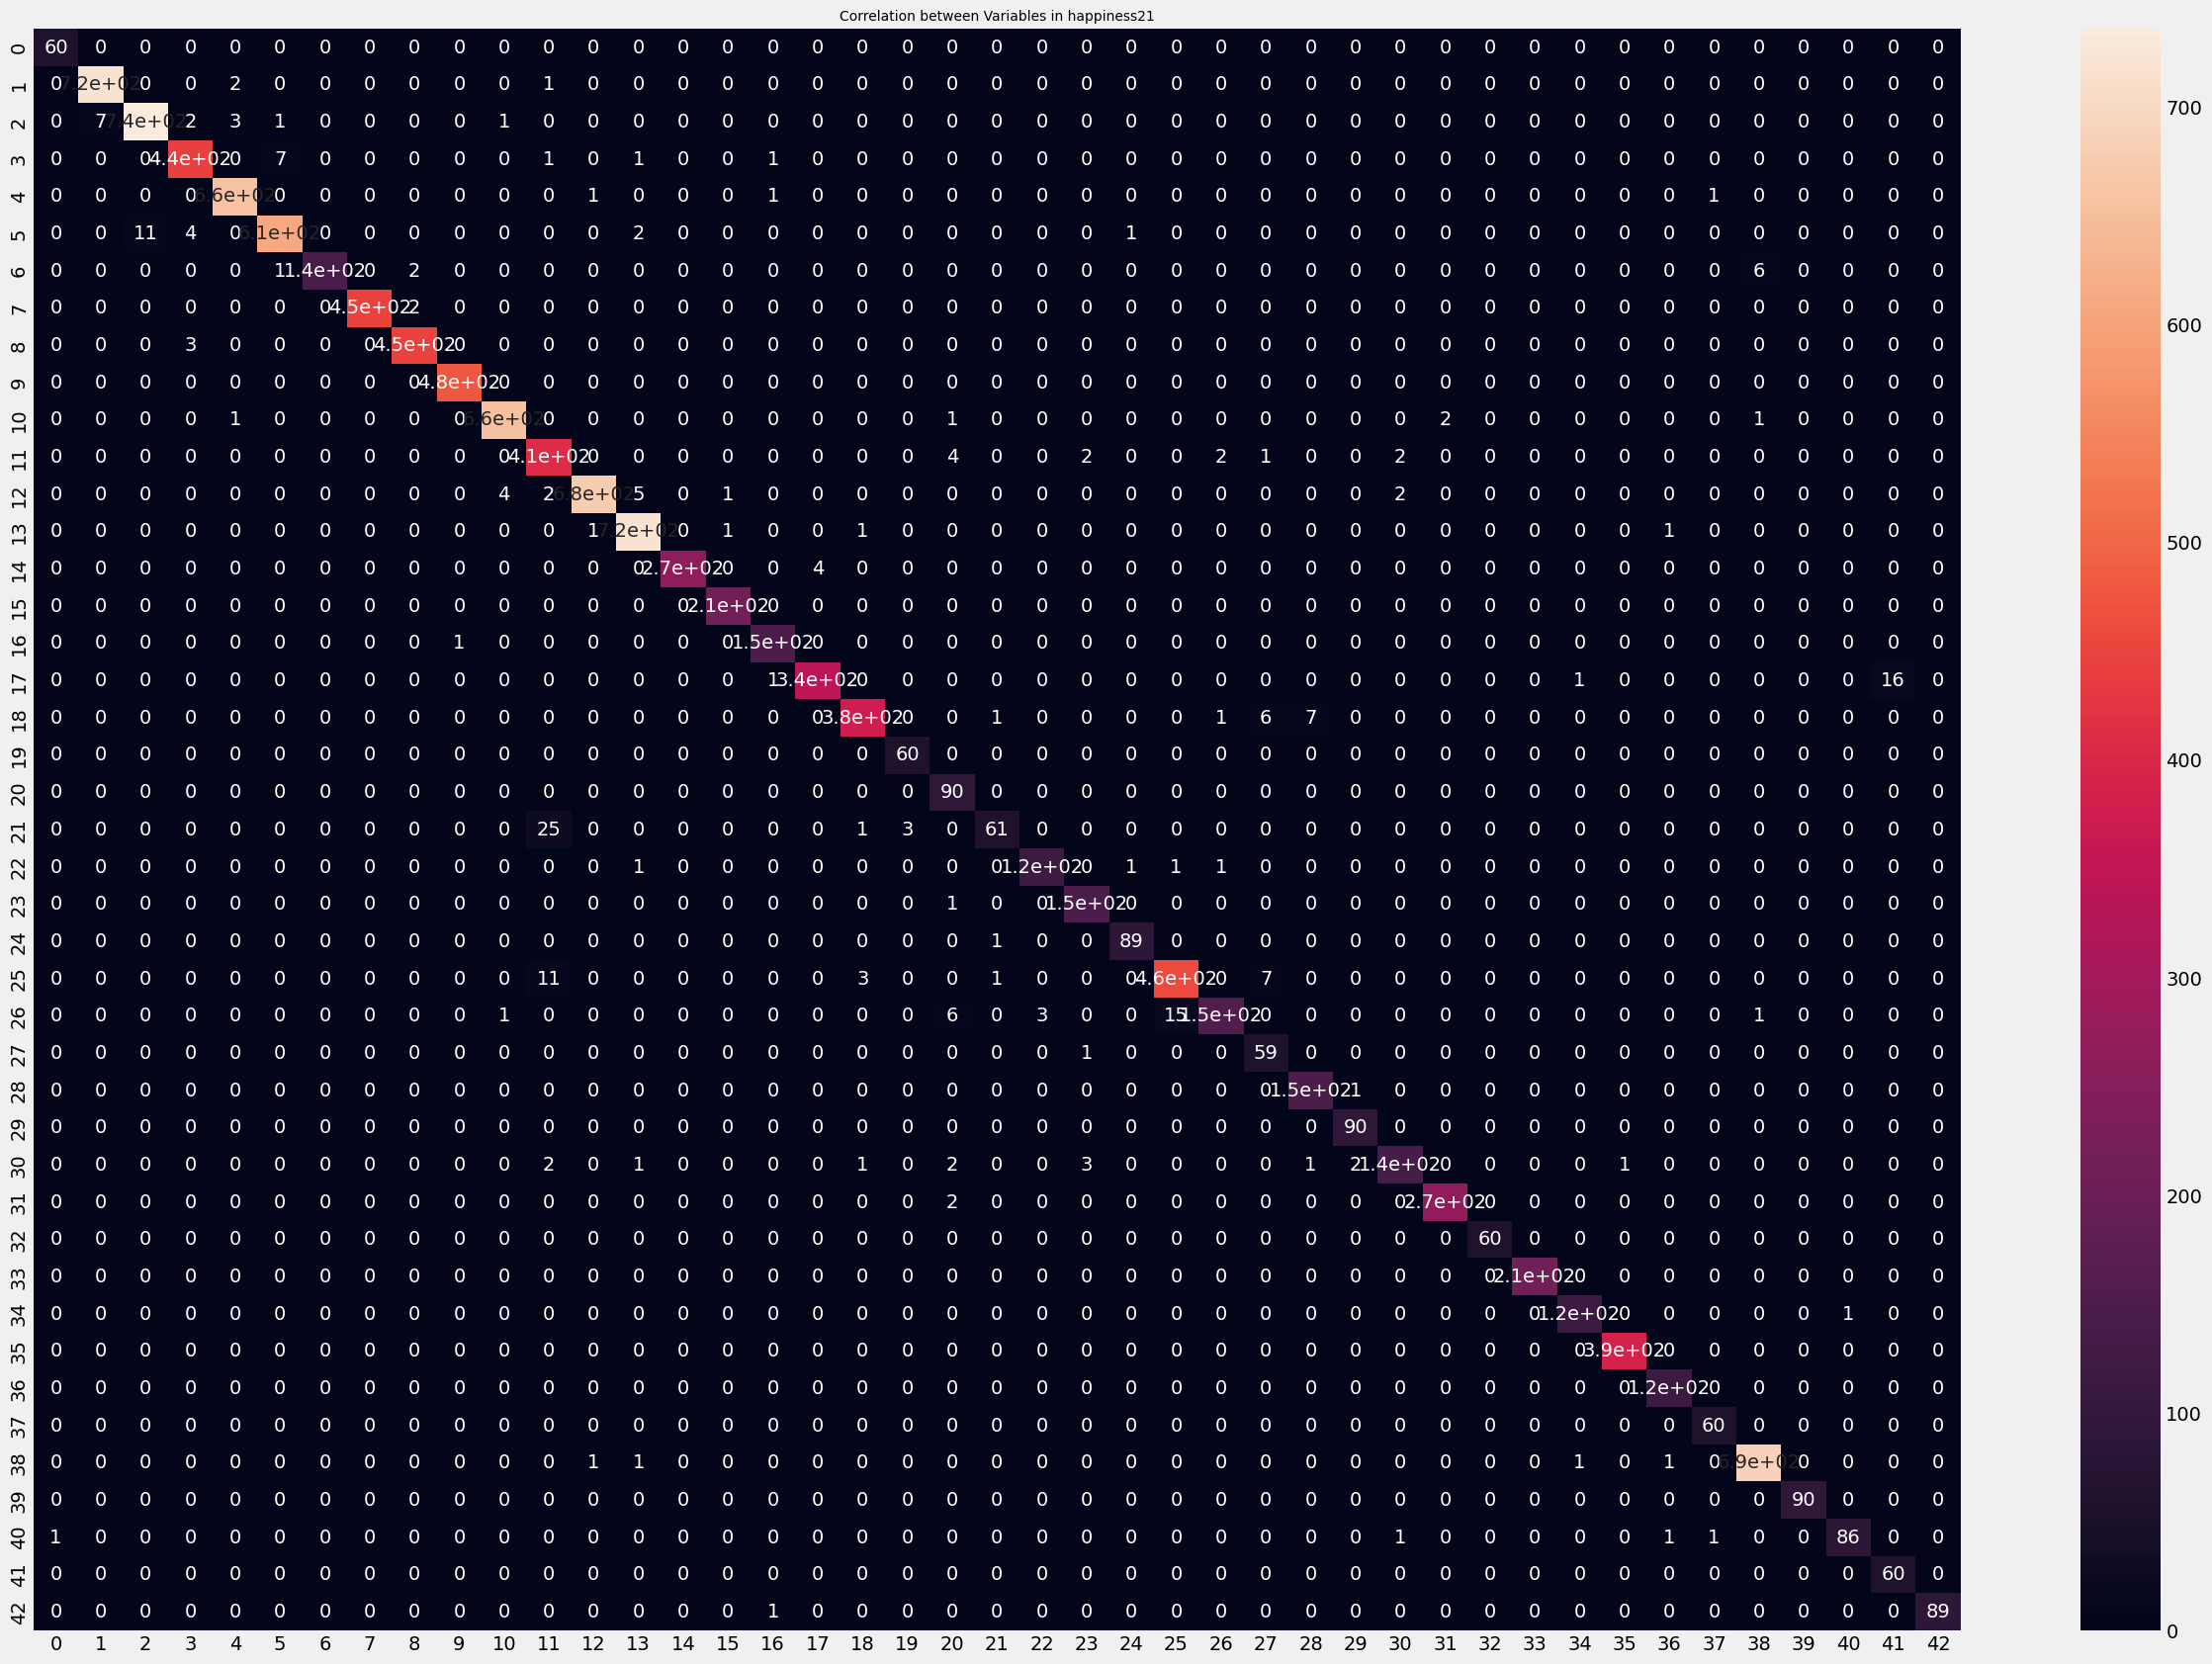

In [58]:
plt.figure(figsize=(28,20))
heatmap(cm,annot=True, fmt='.2g')
plt.title('Correlation between Variables in happiness21', fontsize=10)